In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


# K-Mean Model

In [8]:
kmeans = KMeans(n_clusters=10, random_state=16)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[1 1 9 8 9 4 9 4 4 4 2 5 5 2 4 2 2 5 6 4 8 0 2 6 1 5 4 5 5 5 9 4 5 1 5 5 4
 8 4 4 4 8 9 4 4 9 0 4 8 4 8 4 8 5 2 8 1 2 8 0 0 0 2 0 4 2 0 8 0 8 1 0 9 4
 8 5 8 9 9 8 8 8 6 5 8 9 4 9 8 4 4 4 4 4 2 9 8 0 8 4 4 0 8 0 0 4 8 8 6 8 0
 8 4 0 0 8 0 2 5 5 8 9 6 4 8 4 4 9 4 9 8 2 5 2 9 8 8 8 2 0 0 5 8 8 0 8 8 4
 4 4 8 0 0 0 4 8 5 2 8 8 8 9 1 8 6 4 0 5 9 4 8 2 2 0 0 0 0 2 8 8 3 1 5 8 2
 0 5 8 8 8 4 8 0 4 4 8 4 5 9 2 8 5 1 2 8 2 0 5 8 2 9 8 3 2 4 4 8 0 1 6 4 4
 0 2 4 4 0 4 8 4 5 8 8 1 0 4 3 1 4 5 4 8 8 4 9 0 8 8 0 8 1 8 1 5 1 4 1 2 5
 2 1 5 5 2 5 3 0 4 8 0 4 8 6 0 5 8 8 5 4 4 9 8 9 2 8 8 8 8 0 8 4 4 8 8 8 4
 0 8 4 0 1 8 9 0 8 8 8 0 4 4 8 4 8 8 0 8 8 9 0 8 0 9 8 1 8 8 4 8 2 2 2 8 0
 8 8 5 8 1 0 3 4 0 0 9 8 0 8 4 8 8 8 2 3 2 8 8 8 4 0 0 8 8 8 2 4 1 9 8 3 6
 5 4 9 1 4 2 0 4 4 8 8 0 8 8 8 4 8 4 8 5 0 0 5 1 8 4 4 8 8 8 5 8 8 8 8 8 2
 8 5 8 8 8 0 4 2 8 0 9 8 8 8 4 8 4 0 0 0 8 0 8 4 8 9 9 4 4 8 4 4 4 8 5 4 0
 5 8 5 4 4 1 8 9 8 4 8 4 8 8 8 0 9 7 4 8 4 4 4 0 5 8 0 8 2 8 0 8 4 4 8 2 8
 4 4 4 2 8 4 9 8 2 8 5 5 

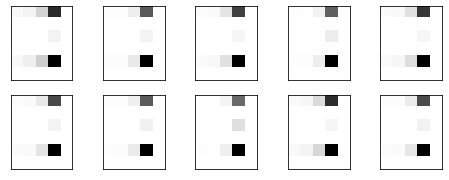

In [9]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9086115992970123

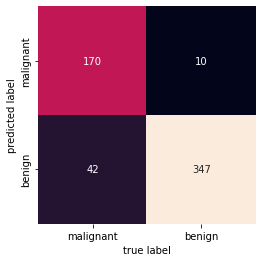

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');